In [1]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
model_sn = os.path.join("C:\\", "Users", "qihao96", "Desktop", "model_sn.npy")

In [21]:
print(model_sn)

C:\Users\qihao96\Desktop\model_sn.npy


In [22]:
depth_file = np.load(model_sn)

In [24]:
depth_file.shape

(697, 128, 416)

In [52]:
len(depth_file)

697

In [26]:
sig_depth = depth_file[0]
sig_depth.shape

(128, 416)

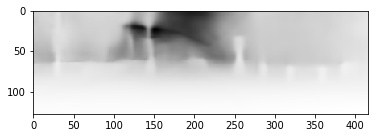

In [73]:
 plt.imshow(depth_file[321], cmap='binary')

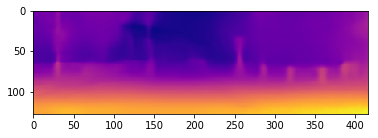

In [76]:
 plt.imshow(1.0/depth_file[321], cmap='plasma')

In [123]:
delta = os.path.join("C:\\", "Users", "qihao96", "Desktop", "1593240007.86-1.npy")

In [124]:
depth_file = np.load(delta)

In [125]:
sig_delta_1 = depth_file[0,:,:,0:3]

In [126]:
sig_delta_1.shape

(128, 416, 3)

In [127]:
np.min(sig_delta_1)

-10.998983

In [128]:
np.max(sig_delta_1)

5.84997

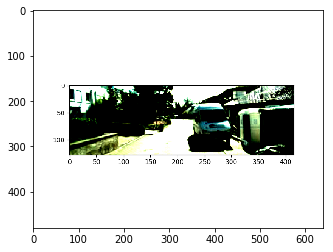

In [139]:
import matplotlib.image as mpimg
rgb_img = mpimg.imread(os.path.join("C:\\", "Users", "qihao96", "Desktop", "1593240007.86-1.png"))
plt.imshow(rgb_img)

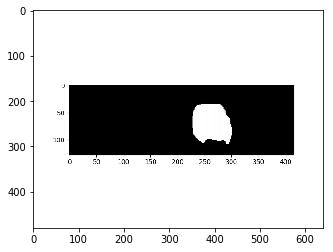

In [145]:
rgb_img = mpimg.imread(os.path.join("C:\\", "Users", "qihao96", "Desktop", "1593240007.86-1-sem.png"))
plt.imshow(rgb_img)

In [129]:
norm_1 = mpl.colors.Normalize(vmin = np.min(sig_delta_1), vmax = np.max(sig_delta_1), clip = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


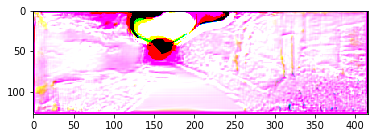

In [134]:
plt.imshow(sig_delta_1*20)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


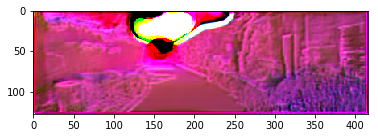

In [136]:
plt.imshow(sig_delta_1*5)

In [50]:
delta_dir = os.path.join("C:\\", "Users", "qihao96", "Desktop", "delta")

In [51]:
delta_files = os.listdir(delta_dir)

In [52]:
len(delta_files)

107

In [53]:
delta_files[0]

'1593240005.61.npy'

In [55]:
import matplotlib as mpl
if os.environ.get('DISPLAY','') == '':
    print('no display found. Using non-interactive Agg backend')
    mpl.use('Agg')
import matplotlib.pyplot as plt

no display found. Using non-interactive Agg backend


In [56]:
vis_delta_dir =  os.path.join("C:\\", "Users", "qihao96", "Desktop", "delta_vis")

In [ ]:
sig_delta_1 = depth_file[0,:,:,0:3]*255

In [95]:
delta_files[60]

'1593240032.74.npy'

In [109]:
img = np.load(os.path.join(delta_dir, delta_files[60]))[1,:,:,6:9]

In [110]:
np.min(img)

-3.371376

In [111]:
np.max(img)

16.869305

In [116]:
np.max(img*5)

84.34653

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


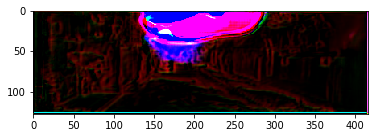

In [140]:
plt.imshow(img*5)

In [121]:
norm_1 = mpl.colors.Normalize(vmin = np.min(img), vmax = np.max(img), clip = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


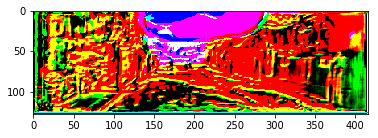

In [122]:
plt.imshow(img*255, norm=norm_1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


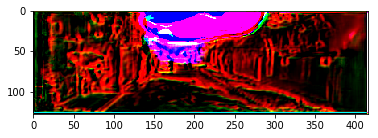

In [142]:
plt.imshow(img*20)

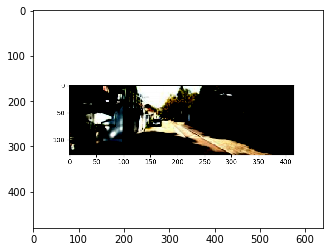

In [143]:
rgb_img = mpimg.imread(os.path.join("C:\\", "Users", "qihao96", "Desktop", "1593240032.74-1.png"))
plt.imshow(rgb_img)

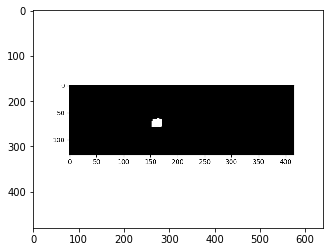

In [147]:
rgb_img = mpimg.imread(os.path.join("C:\\", "Users", "qihao96", "Desktop", "1593240032.74-1-sem.png"))
plt.imshow(rgb_img)